<a href="https://colab.research.google.com/github/jackie-Gung/Colab_ESAA/blob/main/2022_09_16_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4. 모델 훈련**

## **4.1 선형 회귀**
---

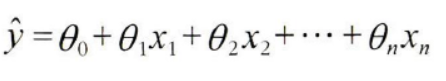

- 일반적인 선형 모델로, 입력 특성의 가중치 합과 편향(절편) 상수를 더하여 예측을 만듦
      1. yhat: 예측값
      2. n: 특성의 수
      3. x(i): i번째 특성값
      4. θ(j): j번째 모델 파라미터

### **4.1.1 정규방정식**

- 정규방정식: 비용 함수를 최소화하는 θ값을 찾기 위한 공식으로, 해석적인 방법에 해당함
      - θhat: 비용 함수를 최소화하는 θ값
      - y: y(1)~y(m)까지 포함하는 타깃 벡터

$$θ = (X^TX)^{-1}X^Ty$$




In [81]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

- inv(): 역행렬 계산
- dot(): 행렬 곱셈

In [82]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.05474816],
       [3.14803016]])

- θhat 구하기

In [83]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.05474816],
       [10.35080847]])

- 그래프로 모델 예측 나타내기

In [84]:
import matplotlib.pyplot as plt

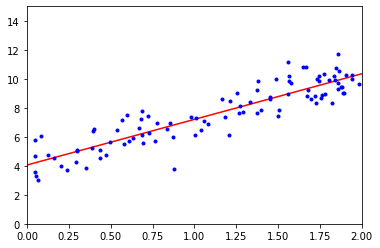

In [85]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

- 사이킷런에서 선형 회귀 수행하기

In [86]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.05474816] [[3.14803016]]
[[ 4.05474816]
 [10.35080847]]


- LinearRegression 클래스는 scipy.linalg.lstsq()함수를 기반으로 함

In [87]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.05474816],
       [3.14803016]])

- 유사역행렬
      1. 특이값 분해(SVD)라고 불리는 표준 행렬 분해 기법 사용
      2. 훈련 세트 행렬 X를 3개의 행렬 곱셈으로 분해함
      3. 시그마를 먼저 구하고 임계값보다 작은 수를 0으로 처리함
      4. 0이 아닌 모든 값을 역수로 치환하고 만들어진 행렬을 전치함
      5. 극단적인 경우에 효율적으로 처리 가능함 (항상 구할 수 있음)

In [88]:
np.linalg.pinv(X_b).dot(y)

array([[4.05474816],
       [3.14803016]])

### **4.1.2 계산 복잡도**

- 역행렬을 계산하는 계산 복잡도

## **4.2 경사 하강법**
---

#### 1. **경사하강법:** 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 비용함수를 최소화하기 위해 반복해서 파라미터를 조성해나가는 방법

#### 2. **학습률:** 경사 하강법에서 중요한 스텝의 크기를 결정하는 하이퍼파라미터
  - 학습률이 너무 작으면 알고리즘 수렴을 위한 반복 횟수가 너무 많아져 시간이 오래 걸림
  - 학습률이 너무 크면 이전보다 더 높은 곳으로 발산할 수 있음

### **4.2.1 배치 경사 하강법**

- 편도 함수: θ가 조금씩 변경될 때마다 비용 함수가 얼마나 바뀌는지 계산하는 함수

In [96]:
# 학습률
eta = 0.1
n_iterations = 1000
m = 100

# 무작위로 초기화하기
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [97]:
theta
# 정규방정식으로 찾은 것과 정확히 같게 나옴

array([[ 3.78027638],
       [-0.28380489]])

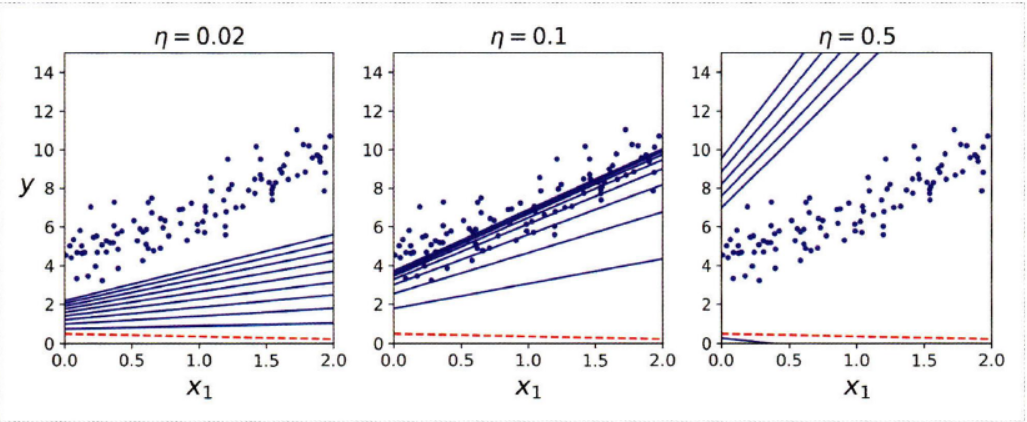

- 왼쪽: 학습률이 너무 낮아서 최적점에 도달하는데 오래 걸릴 것으로 예상
- 가운데: 적당한 학습률이지만 그리드 탐색에서 수렴하는데 오래 걸리는 것을 막기 위해 반복 횟수를 제한해야 함
- 오른쪽: 학습률이 너무 높아 최적점에서 발산하는 형태를 띰

### **4.2.2 확률적 경사 하강법**

#### 1. **배치 경사 하강법의 큰 문제:** 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 것
- 훈련 세트가 커지면 매우 느려짐

#### 2. **확률적 경사 하강법:** 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산함
- 매 반복에서 다뤄야 할 데이터가 적기에 알고리즘이 확실히 빨라짐
- 하지만 확률적이기 때문에 배치 경사 하강법에 비해서 많이 불안정함
- 학습률을 시작할 때 크게 하고 점차 작게 줄이면 알고리즘이 전역 최솟값에 도달하게 됨


In [98]:
# 학습 스케줄 하이퍼파라미터
n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
  return t0 / (t+t1)

# 무작위 초기화
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta*gradients

theta

array([[ 3.77375232],
       [-0.28795256]])

- 사이킷런에서는 SGDRegressor 클래스를 사용해 제곱 오차 비용 함수를 최적화함

In [99]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel()) # ravel: 다차원 배열을 1차원 배열로 바꿈

SGDRegressor(eta0=0.1, penalty=None)

In [100]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.30125006]), array([1.29056868]))

### **4.2.3 미니배치 경사 하강법**

#### 1. 배치 경사 하강법 + 확률적 경사 하강법을 기반으로 그레이디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산함
- 행렬 연산에 최적화된 하드웨어를 사용해 성능이 확률적 경사 하강법에 비해 향상됨
- 미니배치를 꽤 크게 하면 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임

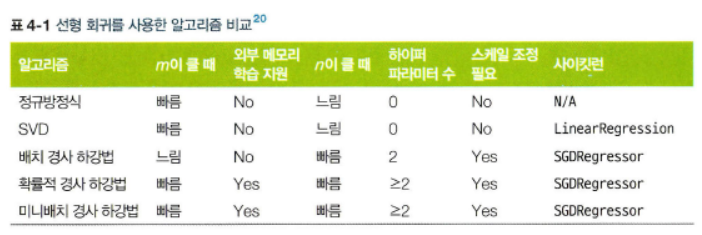

## **4.3 다항 회귀**
---

In [92]:
import numpy as np

In [93]:
# 비정형 데이터 - 2차방정식
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

- 직선은 이 데이터에 잘 맞지 않으므로 사이킷런의 PolynomialFeatures를 사용하여 훈련 데이터 변환시키기

In [94]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[1.31431543]
[1.31431543 1.72742505]


- X_poly는 이제 원래 특성 X와 이 특성의 제곱을 포함함

In [95]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99224182]), array([[1.03589162, 0.48571094]]))

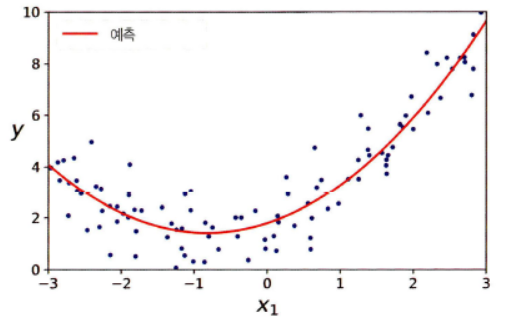

    1.어느정도 적합함
    2. 원래 함수: y = 0.5x^2 + 1.0x + 2
    3. 예측 함수: y = 0.49x^2 + 0.93x + 2.07
    4. 특성이 여러 개일 때 다항회귀는 특성 간 관계를 찾을 수 있음(선형 회귀에서는 못함)

## **4.4 학습 곡선**
---

- 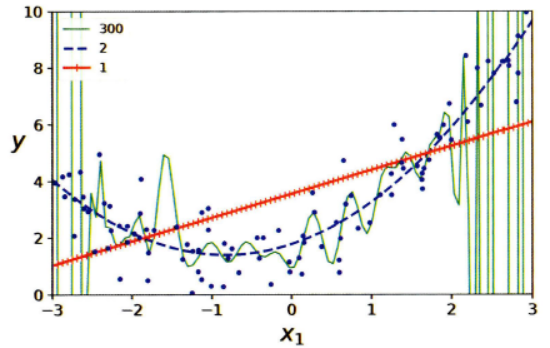

#### **1. 고차 다항 회귀의 특징**
      1) 고차 다항 회귀는 보통 선형 회귀보다 훈련 데이터에 더 잘 맞추려는 경향이 있음
      2) 그로 인해 심각하게 훈련 데이터에 과대적합되고, 선형 회귀는 과소적합됨

#### **2. 모델 사용의 기준**
      1) 교차검증: 일반화 성능을 추정하기 위함
        - 과대적합: 훈련 데이터에서 성능이 좋으나, 교차 검증 점수가 나쁜 경우
        - 과소적합: 훈련 데이터와 교차 검증 점수가 모두 안 좋은 경우
      2) 학습 곡선: 훈련/검증 세트의 모델 성능을 훈련 세트 크기 or 훈련 반복의 함수로 나타냄
        - 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련하면 됨

#### **3. 단순 선형 회귀 모델 (직선)의 학습 곡선**

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='검증 세트')

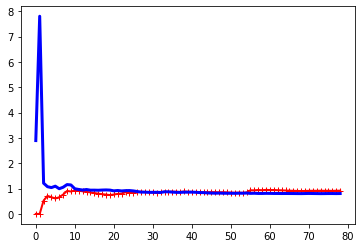

In [90]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

- **결과**
      1. 훈련 데이터
        1) 그래프가 0에서 시작하므로 훈련 세트에 하나 or 두 개의 샘플이 있을 때에는 모델이 완벽하게 작동
        2) 샘플이 추가됨에 따라 잡음과 비선형으로 인해 모델이 완벽하게 학습하는 건 불가능
        3) 따라서 곡선이 평편해질 때까지 오차가 계속 상승
        4) 이 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 변하지 않음

      2. 검증 데이터
        1) 모델이 적은 수의 샘플로는 제대로 일반화할 수 없어서 초기에는 오차가 매우 큼
        2) 모델에 훈련 샘플이 추가되면서 학습이 되고 검증 오차가 점점 줄어듦
        3) 선형 회귀의 직선은 데이터를 잘 모델링 할 수 없어 오차 감소가 완만해져 훈련 세트에 가까워짐

      3. 이 학습 곡선은 전형적인 과소적합의 모습

#### **4. 다항 회귀 모델 (10차)의 학습 곡선**

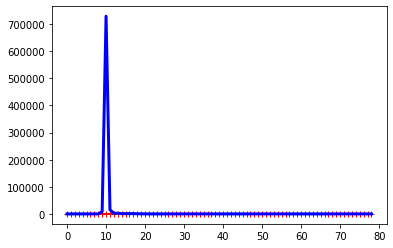

In [91]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

- **결과**
      1. 훈련 데이터의 오차 <<< 선형 회귀 모델 오차
      2. 두 곡선 사이의 공간이 존재함
        -> 훈련 데이터에서의 모델 성능이 검증 데이터보다 훨씬 낫다는 뜻
        -> 과대적합의 예시

- 편향/분산 트레이드오프
      1. 편향: 잘못된 가정으로 **굵은 텍스트**인한 일반화 오차 -> 과소적합 문제
      2. 분산: 훈련 데이터의 작은 변동에 민감하게 반응하여 나타나는 오차 -> 자유도 높으면 분산이 높아져 과대적합 문제
      3. 줄일 수 없는 오차: 데이터 자체의 잡음으로 인한 오차 -> only 잡음을 없애야 오차 줄일 수 있음
      ** 모델 복잡도가 커지면 분산은 up, 편향은 down
      ** 모델 복잡도가 작아지면 분산은 down, 편향은 up

## **4.5 규제가 있는 선형 모델**
---

- **모델 규제:** 과대적합을 감소시키는 방법
- **다항 회귀 모델**의 규제: 다항식의 차수를 감소
- **선형 회귀 모델**의 규제: 모델 가중치 제한
  - 릿지 회귀
  - 라쏘 회귀
  - 엘라스틱넷

### **4.5.1 릿지 회귀**

#### 1. 규제항이 비용 함수에 추가됨(훈련하는 동안에만)
#### 2. 학습 알고리즘을 데이터에 맞추고, 모델의 가중치가 가능한 한 작게 유지되도록 노력함
#### 3. 모델 훈련이 끝나면 모델 성능을 규제가 없는 성능 지표로 평가함
#### 4. 하이퍼파라미터 α
  - 모델을 얼마나 많이 규제할지 조절함
  - α=0: 릿지 회귀 = 선형 회귀
  - α가 크면 모든 가중치가 0에 가까워지고 데이터의 평균을 지나는 수평선이 됨

$$J(θ) = MSE(θ) + α\frac{1}{2}\sum_{i=1}^n θ(i)^2$$

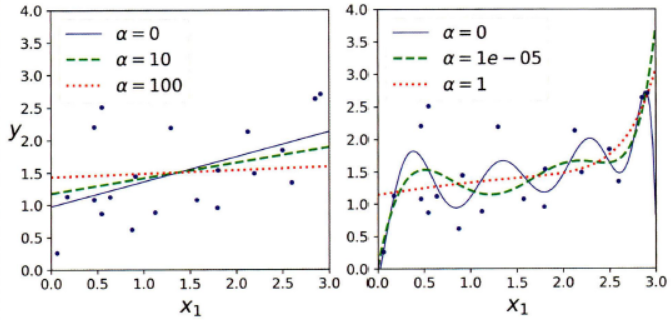

- 왼쪽 그래프: 평범한 릿지 모델을 사용해 선형적인 예측
- 오른쪽 그래프: PolynomialFeatures(degree=10) 사용해 데이터 확장 및 StandardScaler를 사용해 스케일링한 후 릿지 모델을 적용함
  -> 릿지 모델을 사용한 다항 회귀

- α를 증사시킬수록 직선에 가까워짐 
  -> 모델 분산은 down, 편향은 up

- **사이킷런에서 정규방정식을 사용한 릿지 회귀**

In [61]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.79271774]])

- **사이킷럿에서 확률적 경사 하강법을 사용한 릿지 회귀**

In [62]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.78345312])

### **4.5.2 라쏘 회귀**

$$J(θ) = MSE(θ) + α\sum_{i=1}^n|θ(i)|$$

#### 1. 특징
    1) 덜 중요한 특성의 가중치를 제거하려고 함(가중치=0)
    2) 자동으로 특성 선택을 하고 희소 모델을 만듦(0이 아닌 특성의 가중치가 적음)
    

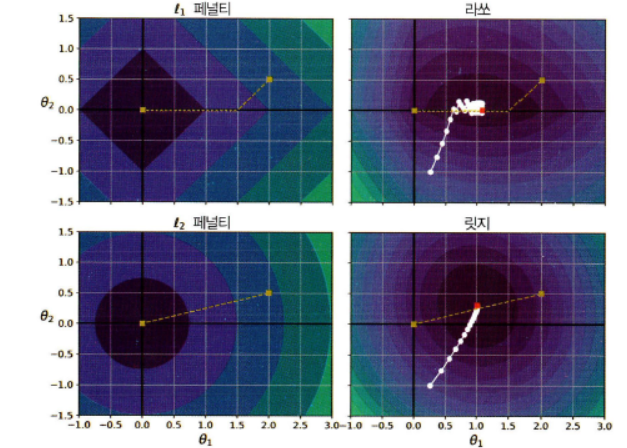

In [63]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.74880711])

### **4.5.3 엘라스틱넷**

- 릿지와 라쏘 회귀를 절충한 모델로, 혼합 정도는 혼합 비율인 r을 사용해 조절함
  - r=1: 라쏘 회귀 -> 특성이 몇개 없을 때
  - r=0: 릿지 회귀 -> 기본

$$J(θ) = MSE(θ) + rα\sum_{i=1}^n|θ(i)| + \frac{1-r}{2}α\sum_{i=1}^n θ(i)^2$$

In [64]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.75290328])

### **4.5.4 조기 종료**

- **조기 종료:** 검증 에러가 최솟값에 도달하면 훈련을 중지함 -> 반복적인 학습 알고리즘을 규제하는 방식

In [80]:
## error 원인을 찾지 못함!

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# data preparation
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
#X_train_poly_scaled = poly_scaler.fit_transform(X_train)
#X_val_poly_scaled = poly_scaler.transform(X_val)

#sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,
#                       penalty=None,learning_rate='constant',eta0=0.0005)
#mini_val_error = float('inf')
#best_epoch=None
#best_model=None
#for epoch in range(1000):
#  sgd_reg.fit(X_train_poly_scaled, y_train)
#  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
#  val_error = mean_squared_error(y_val,y_val_predict)
#  if val_error < mini_val_error:
#    mini_val_error = val_error
#    best_epoch = epoch
#    best_model = clone(sgd_reg)

## **4.6 로지스틱 회귀**
---

### **4.6.1 확률 추정**

- 시그모이드 함수: 0~1 사이의 값을 출력하는 로지스틱

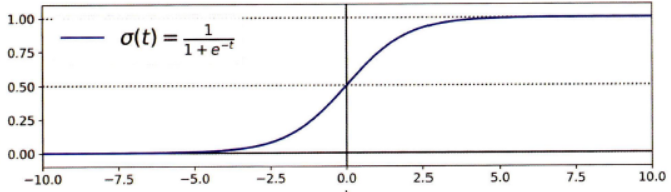

$$σ(t) = \frac{1}{1+exp(-t)}$$

### **4.6.2 훈련과 비용 함수**

- 훈련 시키는 방법
      1. 목적: 양성 샘플에 대해서는 높은 확률로, 음성 샘플에 대해서는 낮은 확률을 추정하는 모델으 파라미터 벡터 theta를 찾는 것
      2. 최소값을 계산하는 해가 없으나, 비용 함수가 볼록 함수이므로 경사 하강법이 전역 최소값을 찾는 것을 보장함

### **4.6.3 결정 경계**

- **꽃잎의 너비를 기반으로 종을 감지하는 분류기 생성하기**

In [68]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [69]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int) # virginica:1 else 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [70]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

- 꽃잎의 너비가 0~3cm인 꽃에 대해 모델 추정 확률 계산하기

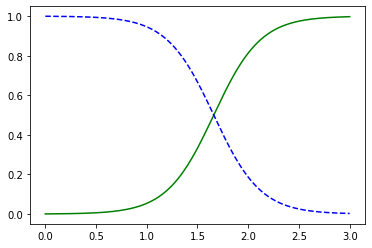

In [71]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label='Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris virginica')

In [72]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### **4.6.4 소프트맥스 회귀**

- **소프트맥스 회귀:** 로지스틱 회귀 모델 중 여러 개의 이진 분류기를 훈련하지 않고 다중 클래스를 지원하도록 일반화한 회귀로 **다항 로지스틱 회귀**라고도 불림

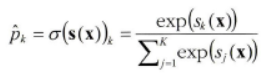

- K: 클래스 수 
- s(x): 샘플 x에 대한 각 클래스의 점수를 담은 벡터
- σ(s(x))k: 샘플 x에 대한 각 클래스 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률

- **크로스 엔트로피 비용 함수**

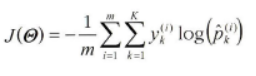

In [74]:
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [75]:
softmax_reg.predict([[5,2]])

array([2])

In [76]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])